In [141]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [138]:
import numpy as np

In [162]:
from tqdm.notebook import tqdm

In [261]:
torch.manual_seed(42)
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    torch.backends.cudnn.deterministic=True
    torch.backends.cudnn.benchmark=False

if torch.backends.mps.is_available():
    device = torch.device("mps")
    torch.mps.manual_seed(42)

print(device)

mps


In [307]:
class CNN_PD(nn.Module):
    def __init__(self) -> None:
        super(CNN_PD, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv1d(3, 8, 5),
            nn.BatchNorm1d(8), #Could Add F.relu as 3rd layer here after BatchNorm
            nn.MaxPool1d(2, 2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv1d(8, 16, 5),
            nn.BatchNorm1d(16),
            nn.MaxPool1d(2,2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv1d(16, 32, 4),
            nn.BatchNorm1d(32),
            nn.MaxPool1d(2,2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv1d(32, 32, 4),
            nn.BatchNorm1d(32),
            nn.MaxPool1d(2,2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv1d(32, 64, 4),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(2,2)
        )
        self.conv6 = nn.Sequential(
            nn.Conv1d(64, 64, 4),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(2,2)
        )
        self.conv7 = nn.Sequential(
            nn.Conv1d(64, 128, 4),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(2,2)
        )
        self.conv8 = nn.Sequential(
            nn.Conv1d(128, 128, 5),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(2,2)
        )
        self.fc = nn.Linear(128*12, 1) #128*12
       

    def forward(self, X):
        X = self.conv1(X)
        X = self.conv2(X)
        X = self.conv3(X)
        X = self.conv4(X)
        X = self.conv5(X)
        X = self.conv6(X)
        X = self.conv7(X)
        X = self.conv8(X)
        X = X.view(-1, 128*12) #Batch
        X = self.fc(X)
        
        return X


In [306]:
class CNN_PD_9CH(nn.Module):
    def __init__(self) -> None:
        super(CNN_PD_9CH, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv1d(3, 16, 5),
            nn.BatchNorm1d(16), #Could Add F.relu as 3rd layer here after BatchNorm
            nn.MaxPool1d(2, 2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv1d(16, 16, 5),
            nn.BatchNorm1d(16),
            nn.MaxPool1d(2,2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv1d(16, 32, 4),
            nn.BatchNorm1d(32),
            nn.MaxPool1d(2,2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv1d(32, 32, 4),
            nn.BatchNorm1d(32),
            nn.MaxPool1d(2,2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv1d(32, 64, 4),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(2,2)
        )
        self.conv6 = nn.Sequential(
            nn.Conv1d(64, 64, 4),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(2,2)
        )
        self.conv7 = nn.Sequential(
            nn.Conv1d(64, 128, 4),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(2,2)
        )
        self.conv8 = nn.Sequential(
            nn.Conv1d(128, 128, 5),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(2,2)
        )
        self.fc = nn.Linear(128*12, 1) #128*12
       

    def forward(self, X):
        X = self.conv1(X)
        X = self.conv2(X)
        X = self.conv3(X)
        X = self.conv4(X)
        X = self.conv5(X)
        X = self.conv6(X)
        X = self.conv7(X)
        X = self.conv8(X)
        X = X.view(-1, 128*12) #Batch
        X = self.fc(X)
        
        return X

In [327]:
NUM_EPOCHS=30 #100
BATCH_SIZE=16

In [328]:
model = CNN_PD()
# model.load_state_dict("model.tar")
loss_module = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
print(model)

CNN_PD(
  (conv1): Sequential(
    (0): Conv1d(3, 8, kernel_size=(5,), stride=(1,))
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv1d(8, 16, kernel_size=(5,), stride=(1,))
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv1d(16, 32, kernel_size=(4,), stride=(1,))
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv1d(32, 32, kernel_size=(4,), stride=(1,))
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=

In [ ]:
for name, param in model.named_parameters():
    print(name, param.shape)

In [329]:
model = model.to(device)

In [330]:
X_train, X_test, Y_train, Y_test = np.load('X_train.npy'), np.load('X_test.npy'), np.load('y_train.npy'), np.load('y_test.npy')

In [331]:
print(X_train.shape, X_test.shape)

(1789, 4000, 3) (199, 4000, 3)


In [320]:
class UserAccelDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]

In [335]:
train_dataset = UserAccelDataset(torch.tensor(X_train, dtype=torch.float32).permute(0, 2, 1), torch.tensor(Y_train, dtype=torch.long))
test_dataset = UserAccelDataset(torch.tensor(X_test, dtype=torch.float32).permute(0, 2, 1), torch.tensor(Y_test, dtype=torch.long))
print(train_dataset.data.shape)
print(test_dataset.data.shape)

torch.Size([1789, 3, 4000])
torch.Size([199, 3, 4000])


In [336]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)


In [338]:
# Train

model.train()
loss_train=[]
loss_test = []
for epoch in tqdm(range(NUM_EPOCHS)):
    loss_ls = []
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        preds = model(inputs)
        preds = preds.squeeze(dim=1)
        loss = loss_module(preds, labels.float())
        loss_ls.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Training Loss: ", np.mean(loss_ls))
    loss_train.append(np.mean(loss_ls))

    true_preds = 0
    num_preds = 0

    
    with torch.no_grad():
        loss_ts=[]
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            #print(inputs.shape)
            preds = model(inputs)
            preds = preds.squeeze(dim=1)
            loss = loss_module(preds, labels.float())
            loss_ts.append(loss.item())
            preds = F.sigmoid(preds)
            # print(preds)
            pred_labels = (preds>=0.5).long()
            true_preds = (pred_labels==labels).sum()
            num_preds = labels.shape[0]
    acc = true_preds/num_preds
    print("Eval loss: ", np.mean(loss_ts))
    print("Eval Accuracy: ", acc*100)
    loss_test.append(np.mean(loss_ts))


  0%|          | 0/30 [00:00<?, ?it/s]

Training Loss:  0.2077348630742303
Eval loss:  0.7745232582092285
Eval Accuracy:  tensor(57.1429, device='mps:0')
Training Loss:  0.15990460351375596
Eval loss:  0.8040136190561148
Eval Accuracy:  tensor(71.4286, device='mps:0')
Training Loss:  0.13579537463374436
Eval loss:  0.8780617026182321
Eval Accuracy:  tensor(57.1429, device='mps:0')
Training Loss:  0.11053075235603112
Eval loss:  0.8093953224328848
Eval Accuracy:  tensor(57.1429, device='mps:0')
Training Loss:  0.0901795483992568
Eval loss:  0.9358590107697707
Eval Accuracy:  tensor(57.1429, device='mps:0')
Training Loss:  0.06927336240187287
Eval loss:  0.9492923227640299
Eval Accuracy:  tensor(28.5714, device='mps:0')
Training Loss:  0.05570474345170494
Eval loss:  1.0066382403557117
Eval Accuracy:  tensor(71.4286, device='mps:0')
Training Loss:  0.04650395864986682
Eval loss:  1.1606886753669152
Eval Accuracy:  tensor(57.1429, device='mps:0')
Training Loss:  0.04267419010284357
Eval loss:  1.1048576006522546
Eval Accuracy: 

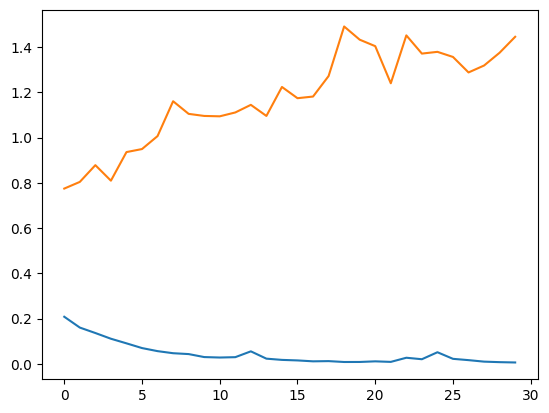

In [340]:
import matplotlib.pyplot as plt

plt.plot(loss_train)
plt.plot(loss_test)

In [282]:
torch.save(model.state_dict(), "model.tar")

In [300]:
model = CNN_PD()
model.load_state_dict(torch.load("model.tar"))
model.eval()
model = model.to(device)

true_preds = 0
num_preds = 0

with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        #print(inputs.shape)
        preds = model(inputs)
        preds = preds.squeeze(dim=1)
        preds = F.sigmoid(preds)
        # print(preds)
        pred_labels = (preds>=0.5).long()
        true_preds = (pred_labels==labels).sum()
        num_preds = labels.shape[0]
acc = true_preds/num_preds

print("Accuracy: ", acc*100)

Accuracy:  tensor(57.1429, device='mps:0')
